In [1]:
import numpy as np
import xarray as xr
import netCDF4
import os
import datetime
import matplotlib.pyplot as plt 
from matplotlib import cm
import shutil
from datetime import datetime, timedelta
import glob
import datetime as dt
from os import path
import os
import cartopy.crs as ccrs
import fsspec
import git 
import json
import sys
import yaml
import requests
import cdsapi
from datetime import timezone
from functions_rf import *
import math 
from functions_verification import *

Using TensorFlow backend.


Date: August 2023

Author: Martin Wegmann

Contact: martinwegmann@pm.me


This notebook will download and postprocess the ERA5 and ERA5-land data in hourly resolution for the location of the LéXPLORE platform. Since both products are gridded, it will extract the information from the closest grid. For further information about the data see: https://cds.climate.copernicus.eu/#!/home

This notebook will also download and postprocess water temperature data in three hourly resolution from the MeteoLakes model for Lake Geneva for the location of the LéXPLORE platform. Since this product gridded, it will extract the information from the closest grid. For more information about the data see: http://meteolakes.ch/#!/data

This notebook will also post-process MeteoSwiss Cosmo data. This data set is not open-access. This data set comes from and enduser license agreement between MeteoSwiss and EAWAG. The gridded Cosmo data is provided for forcing the lake models at EAWAG.

The Cosmo .json data that is read in below is the closest gridpoint to the LeXPLORE platform in that gridded Cosmo data set and only covers the period of interest for this project. The data set is a high-resolution weather forecast / climate reanalysis for Switzerland. 

In [2]:
# change yaml location here
with open(r"/Volumes/lexplore_hd/scripts/folder_gap_filling.yaml", "r") as f:
    directories = yaml.load(f, Loader=yaml.FullLoader)

In [3]:
# change yaml location here
with open(r"/Volumes/lexplore_hd/scripts/boundary_conditions_gap_filling.yaml", "r") as f:
    conditions = yaml.load(f, Loader=yaml.FullLoader)

In [4]:
startyear=2020
today= datetime.today()
endyear=2023

focus_start=conditions["focus_period_start"]
focus_end=conditions["focus_period_end"]

### folder structure

In [6]:
for d in directories.values():
    if not os.path.exists(d):
        os.makedirs(d)

16:03:42.283544   Creating directories


In [5]:
# defining folders
input_folder=directories["g2s_input_folder"]
output_folder=input_folder

scripts_folder=directories["scripts_folder"]

era5_folder=directories["era5_folder"]

era5_land_folder=directories["era5_land_folder"]

cosmo_folder=directories["ms_cosmo_folder"]

## get era5 and era5 land hourly data

In [9]:
era_variables=['10m_u_component_of_wind', '10m_v_component_of_wind', '2m_temperature','surface_pressure','surface_solar_radiation_downwards','total_precipitation']

In [10]:
era_area=[48, 5, 45,8,] # maxlat,minlon,minlat,maxlon

In [11]:
era5_land_data=get_era5_land_hourly_lexplore(startyear=startyear,area=era_area,variables=era_variables,wd=era5_land_folder)

the following years are included:
['2020', '2021', '2022', '2023']
Most recent month is not January


2023-08-10 16:03:42,570 INFO Welcome to the CDS
2023-08-10 16:03:42,571 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2023-08-10 16:03:42,830 INFO Request is completed
2023-08-10 16:03:42,831 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data0/adaptor.mars.internal-1691657461.0751097-30626-17-5067fb8a-2571-477f-8b6d-99d0b8122b76.nc to /Volumes/lexplore_hd/era5land/g2s/era5_land_lexplore_202301_10m_u_component_of_wind.nc (1.4M)
2023-08-10 16:03:43,465 INFO Download rate 2.2M/s                                                                                                                                                                                              
2023-08-10 16:03:43,562 INFO Welcome to the CDS
2023-08-10 16:03:43,563 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2023-08-10 16:03:43,712 INFO Downloading https://download-0009-cl

2023-08-10 16:03:57,199 INFO Download rate 1.1M/s                                                                                                                                                                                              
2023-08-10 16:03:57,306 INFO Welcome to the CDS
2023-08-10 16:03:57,308 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2023-08-10 16:03:57,478 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data8/adaptor.mars.internal-1691658958.3722377-9675-6-e113b6de-a0dc-4b7b-82ae-233fbb32a61f.nc to /Volumes/lexplore_hd/era5land/g2s/era5_land_lexplore_202303_10m_u_component_of_wind.nc (1.4M)
2023-08-10 16:03:58,117 INFO Download rate 2.1M/s                                                                                                                                                                                              
2023-08-10 16:03:58,211 INFO Welcome to the C

2023-08-10 16:04:11,164 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data4/adaptor.mars.internal-1691660405.0174217-23969-3-fbc400e0-8ea7-452f-81a1-f8329a3e6d45.nc to /Volumes/lexplore_hd/era5land/g2s/era5_land_lexplore_202304_total_precipitation.nc (1.3M)
2023-08-10 16:04:11,636 INFO Download rate 2.8M/s                                                                                                                                                                                              
2023-08-10 16:04:11,745 INFO Welcome to the CDS
2023-08-10 16:04:11,746 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2023-08-10 16:04:11,936 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data4/adaptor.mars.internal-1691660523.5305645-20686-2-12a8c6e8-0df7-4a33-889d-842ad52ba66f.nc to /Volumes/lexplore_hd/era5land/g2s/era5_land_lexplore_202305_10m_u_component_of_w

2023-08-10 16:04:37,410 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data8/adaptor.mars.internal-1691662913.648606-22911-16-c0ddf0c2-bfa6-4520-84d5-cef315014ffd.nc to /Volumes/lexplore_hd/era5land/g2s/era5_land_lexplore_newest_data_surface_solar_radiation_downwards.nc (136.8K)
2023-08-10 16:04:37,667 INFO Download rate 533.9K/s                                                                                                                                                                                            
2023-08-10 16:04:37,762 INFO Welcome to the CDS
2023-08-10 16:04:37,762 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2023-08-10 16:04:37,908 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data7/adaptor.mars.internal-1691662928.2725427-305-14-9f38c47a-47a2-46a5-ac47-dd83004bf512.nc to /Volumes/lexplore_hd/era5land/g2s/era5_land_lexplore_newest_

In [12]:
era5_data=get_era5_hourly_lexplore(startyear=startyear,area=era_area,variables=era_variables,wd=era5_folder)

2023-08-10 16:04:53,923 INFO Welcome to the CDS
2023-08-10 16:04:53,923 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-08-10 16:04:54,066 INFO Request is completed
2023-08-10 16:04:54,067 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data7/adaptor.mars.internal-1691665220.1666658-2957-9-8aa4950a-a959-41ef-a8da-d9211bbc9025.nc to /Volumes/lexplore_hd/era5/g2s/era5_lexplore_2023.nc (19.7M)
2023-08-10 16:04:59,515 INFO Download rate 3.6M/s                                                                                                                                                                                              
2023-08-10 16:04:59,673 INFO Welcome to the CDS
2023-08-10 16:04:59,674 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-08-10 16:04:59,834 INFO Downloading https://download-0012-clone.copernicus-climate.e

## get meteolakes 

In [6]:
meteolakes,nc_location=get_historical_meteolakes_lexplore(startyear=startyear,endyear=endyear,output_folder=output_folder)

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [400]>
Data is missing for this month
<Response [400]>
Data is missing for this month
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
Data written to /Volumes/lexplore_hd/g2s_input/540996_150144_geneva_temperature_1696129200000_1698796800000.csv
Data written to /Volumes/lexplore_hd/g2s_inp

## Postprocess Data

### MeteoSwiss Cosmo

Apparently there are some missing data coming out from the meteoswiss api:

* Failed to fetch data for 20200105 to 20200106
* Failed to fetch data for 20200106 to 20200107
* Failed to fetch data for 20200406 to 20200407
* Failed to fetch data for 20200407 to 20200408
* Failed to fetch data for 20200408 to 20200409
* Failed to fetch data for 20200409 to 20200410
* Failed to fetch data for 20200410 to 20200411
* Failed to fetch data for 20200411 to 20200412
* Failed to fetch data for 20200412 to 20200413
* Failed to fetch data for 20200413 to 20200414
* Failed to fetch data for 20200616 to 20200617
* Failed to fetch data for 20200617 to 20200618
* Failed to fetch data for 20200621 to 20200622
* Failed to fetch data for 20200622 to 20200623
* Failed to fetch data for 20200828 to 20200829
* Failed to fetch data for 20200829 to 20200830
* Failed to fetch data for 20200830 to 20200831
* Failed to fetch data for 20201110 to 20201111
* Failed to fetch data for 20201111 to 20201112
* Failed to fetch data for 20201112 to 20201113
* Failed to fetch data for 20201113 to 20201114
* Failed to fetch data for 20201114 to 20201115
* Failed to fetch data for 20201214 to 20201215
* Failed to fetch data for 20201215 to 20201216
* Failed to fetch data for 20210110 to 20210111
* Failed to fetch data for 20210312 to 20210313
* Failed to fetch data for 20210423 to 20210424
* Failed to fetch data for 20210611 to 20210612
* Failed to fetch data for 20210903 to 20210904
* Failed to fetch data for 20220416 to 20220417
* Failed to fetch data for 20220417 to 20220418
* Failed to fetch data for 20220610 to 20220611

In [11]:
files = [cosmo_folder+filename for filename in rm_point(os.listdir(cosmo_folder))]
json_files=[]
for file in files:
    if file.endswith(".json"):
        json_files.append(file)
sorted_json_files=sorted(json_files)



In [12]:
variables_of_interest=["T_2M","RELHUM_2M","TOT_PREC","PS","GLOB","CLCT","U","V"]

In [13]:
pd_df_list=[]
for json_file in sorted_json_files:
    with open(json_file) as f:
        d = json.load(f)
        pd_list=[]
        for variable in variables_of_interest:
            df=pd.DataFrame(d[variable]["data"],index=d["time"],columns=[variable])
            pd_list.append(df)
        pd_df=pd.concat(pd_list,axis=1)
        pd_df_list.append(pd_df)



In [14]:
all_json_as_pd_df=pd.concat(pd_df_list,axis=0)

In [15]:
all_json_as_pd_df.sort_index(inplace = True)

In [16]:
all_json_as_xr=all_json_as_pd_df.to_xarray()

In [17]:
all_json_as_xr=all_json_as_xr.rename({'index':'time'})

In [18]:
all_json_as_xr["time"]=pd.to_datetime(all_json_as_pd_df.index)

In [19]:
all_json_as_xr_1hr=all_json_as_xr.resample(time="1H").mean()

In [20]:
all_json_as_xr_1hr.sel(time=slice(focus_start,focus_end))

<xarray.Dataset>
Dimensions:    (time: 26280)
Coordinates:
  * time       (time) datetime64[ns] 2020-06-01 ... 2023-05-31T23:00:00
Data variables:
    T_2M       (time) float64 290.6 289.2 288.7 289.3 ... 290.4 291.3 290.2
    RELHUM_2M  (time) float64 54.83 54.87 65.31 64.87 ... 73.98 81.6 70.38 63.92
    TOT_PREC   (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.006592 0.0 0.0
    PS         (time) float64 9.736e+04 9.737e+04 ... 9.738e+04 9.74e+04
    GLOB       (time) float64 0.0 0.0 0.0 0.0 0.8862 ... 0.2646 0.0 0.0 0.0
    CLCT       (time) float64 43.57 56.79 62.31 33.62 ... 100.0 100.0 33.53 1.34
    U          (time) float64 -1.522 -2.47 0.1143 -0.2411 ... -2.0 1.378 -2.15
    V          (time) float64 -1.254 -1.785 -0.6686 ... 0.9233 -2.104 -1.086

In [21]:
all_json_as_xr_1hr.sel(time=slice(focus_start,focus_end)).to_netcdf(output_folder+"cosmo_1hr_g2s.nc")

### era5 and era5 land

In [14]:
# lat lon location of the platform
lon_platform=6.67
lat_platform=46.5

In [15]:
era5_data_lexplore=era5_data.sel(time=slice(focus_start,focus_end)).sel(longitude=lon_platform,latitude=lat_platform,method="nearest")

In [16]:
era5_data_lexplore

<xarray.Dataset>
Dimensions:    (time: 26280)
Coordinates:
    longitude  float32 6.75
    latitude   float32 46.5
  * time       (time) datetime64[ns] 2020-06-01 ... 2023-05-31T23:00:00
Data variables:
    u10        (time) float32 dask.array<chunksize=(5136,), meta=np.ndarray>
    v10        (time) float32 dask.array<chunksize=(5136,), meta=np.ndarray>
    t2m        (time) float32 dask.array<chunksize=(5136,), meta=np.ndarray>
    sp         (time) float32 dask.array<chunksize=(5136,), meta=np.ndarray>
    ssrd       (time) float32 dask.array<chunksize=(5136,), meta=np.ndarray>
    tp         (time) float32 dask.array<chunksize=(5136,), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-06-05 18:55:56 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [17]:
era5_land_data_lexplore=era5_land_data.sel(time=slice(focus_start,focus_end)).sel(longitude=lon_platform,latitude=lat_platform,method="nearest")

In [18]:
era5_land_data_lexplore

<xarray.Dataset>
Dimensions:    (time: 26280)
Coordinates:
    longitude  float32 6.7
    latitude   float32 46.5
  * time       (time) datetime64[ns] 2020-06-01 ... 2023-05-31T23:00:00
Data variables:
    sp         (time) float32 dask.array<chunksize=(720,), meta=np.ndarray>
    ssrd       (time) float32 dask.array<chunksize=(720,), meta=np.ndarray>
    t2m        (time) float32 dask.array<chunksize=(720,), meta=np.ndarray>
    tp         (time) float32 dask.array<chunksize=(720,), meta=np.ndarray>
    u10        (time) float32 dask.array<chunksize=(720,), meta=np.ndarray>
    v10        (time) float32 dask.array<chunksize=(720,), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-05-13 10:24:45 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [19]:
era5_land_data_lexplore.to_netcdf(output_folder+"era5_land_lexplore_g2s.nc")

In [20]:
era5_data_lexplore.to_netcdf(output_folder+"era5_lexplore_g2s.nc")

### meteolakes

In [7]:
meteolakes=meteolakes.sel(time=slice(focus_start,focus_end))

In [8]:
meteolakes

<xarray.DataArray 'Temp' (time: 8760, depth: 51)>
array([[ 5.667,  5.675,  5.711, ..., 14.602, 14.599, 14.597],
       [ 5.668,  5.679,  5.724, ..., 14.675, 14.673, 14.671],
       [ 5.664,  5.674,  5.706, ..., 14.645, 14.645, 14.644],
       ...,
       [ 6.546,  6.558,  6.579, ..., 13.294, 13.302, 13.306],
       [ 6.545,  6.558,  6.582, ..., 13.371, 13.377, 13.379],
       [ 6.541,  6.554,  6.575, ..., 13.332, 13.335, 13.336]])
Coordinates:
  * depth    (depth) float64 -191.1 -177.6 -164.0 -150.4 ... -2.9 -1.9 -1.1 -0.6
  * time     (time) datetime64[ns] 2020-06-01 ... 2023-05-31T21:00:00
Attributes:
    description:  Water Temperature
    units:        degC

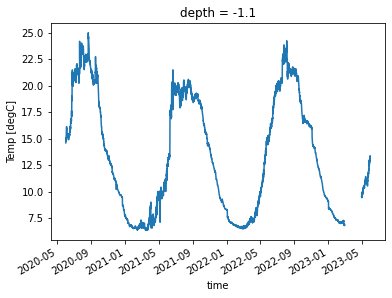

In [10]:
meteolakes.sel(depth=-1.1).plot()

In [11]:
meteolakes.to_netcdf(output_folder+"meteolakes_g2s.nc")